In [2]:
# !pip install ydata-profiling

  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 390.6/390.6 kB 8.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 296.5/296.5 kB 20.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 686.1/686.1 kB 28.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 104.8/104.8 kB 7.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.5/4.5 MB 75.3 MB/s eta 0:00:00
  Created wheel for htmlmin: filename=htmlmin-0.1.12-py3-none-any.whl size=27081 sha256=c62128dfe18f5b84e6a1be002b4d4aeeb8143c9de316fd1132e121cc6fdfb369
  Stored in directory: /root/.cache/pip/wheels/dd/91/29/a79cecb328d01739e64017b6fb9a1ab9d8cb1853098ec5966d
Successfully built htmlmin


In [4]:
# !pip install sweetviz

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 15.1/15.1 MB 80.5 MB/s eta 0:00:00


In [8]:
# !pip install langchain transformers

In [15]:
# !pip install langchain_community
# !pip install --upgrade langchain
# !pip install --upgrade transformers

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.1/44.1 kB 1.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.0/10.0 MB 32.1 MB/s eta 0:00:00
  Attempting uninstall: transformers
    Found existing installation: transformers 4.46.2
    Uninstalling transformers-4.46.2:
      Successfully uninstalled transformers-4.46.2


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from ydata_profiling import ProfileReport
import sweetviz as sv
import json

In [46]:
class EDA:
    def __init__(self, dataset):
        self.dataset = dataset
        self.report = None

    def generate_basic_summary(self):
        """Generate basic summary statistics of the dataset"""
        summary = self.dataset.describe(include='all').to_dict()  # Include all columns
        missing_data = self.dataset.isnull().sum().to_dict()
        return summary, missing_data

    def visualize_data(self):
        """Visualize distributions and relationships in the dataset"""
        # Numeric columns for histograms and correlation matrix
        numeric_cols = self.dataset.select_dtypes(include=['number', 'datetime']).columns

        if len(numeric_cols) > 0:
            # Histograms for numeric columns
            self.dataset[numeric_cols].hist(figsize=(10, 8), bins=20)
            plt.tight_layout()
            plt.show()

            # Correlation Heatmap
            corr = self.dataset[numeric_cols].corr()
            plt.figure(figsize=(10, 8))
            sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f')
            plt.title('Correlation Heatmap')
            plt.show()
        else:
            print("No numerical columns to visualize.")

    def advanced_visualizations(self):
        """Visualize advanced relationships using Plotly and seaborn"""
        numeric_cols = self.dataset.select_dtypes(include='number').columns
        categorical_cols = self.dataset.select_dtypes(include='object').columns

        if len(numeric_cols) > 0:
            # Pairplot to show scatterplot matrix and distributions
            sns.pairplot(self.dataset[numeric_cols])
            plt.show()

            # Boxplot to detect outliers in numeric columns
            plt.figure(figsize=(10, 8))
            sns.boxplot(data=self.dataset[numeric_cols])
            plt.title('Boxplot for Outlier Detection')
            plt.show()

            # Visualize pairwise correlations using Plotly scatter matrix
            fig = px.scatter_matrix(self.dataset, dimensions=numeric_cols)
            fig.show()

        if len(categorical_cols) > 0:
            # Countplot for categorical columns to understand their distribution
            for col in categorical_cols:
                plt.figure(figsize=(8, 6))
                sns.countplot(data=self.dataset, x=col)
                plt.title(f'Distribution of {col}')
                plt.xticks(rotation=45)
                plt.show()

    def detect_outliers(self):
        """Detect outliers using Z-Score"""
        from scipy import stats

        numeric_cols = self.dataset.select_dtypes(include='number').columns
        X = self.dataset[numeric_cols]

        # replace missing values with mean
        X_cleaned = X.fillna(X.mean())

        # Calculate Z-scores
        z_scores = stats.zscore(X_cleaned)

        # Define a threshold for detecting outliers (e.g., z-score > 3 or < -3)
        threshold = 3
        outliers = (abs(z_scores) > threshold).any(axis=1)

        # Print the outlier rows for inspection
        outlier_rows = X_cleaned[outliers]

        return outlier_rows

    def skewness_and_kurtosis(self):
        """Calculate skewness and kurtosis for numerical columns"""
        numeric_cols = self.dataset.select_dtypes(include='number').columns
        if len(numeric_cols) > 0:
            skewness = self.dataset[numeric_cols].skew().to_dict()
            kurtosis = self.dataset[numeric_cols].kurtosis().to_dict()
            return skewness, kurtosis
        else:
            print("No numerical columns for skewness and kurtosis calculation.")
            return {}, {}

    def generate_advanced_report(self):
        """Generate a comprehensive EDA report using pandas profiling"""
        profile = ProfileReport(self.dataset, title="EDA Report", explorative=True)
        self.report = profile
        return profile.to_notebook_iframe()

    def generate_sweetviz_report(self):
        """Generate EDA report and save insights in JSON format."""
        # Extract summary statistics and missing data
        summary, missing_data = self.generate_basic_summary()

        # Additional dataset-level insights (e.g., number of rows, columns, etc.)
        dataset_info = {
            "num_rows": self.dataset.shape[0],
            "num_columns": self.dataset.shape[1],
            "column_names": list(self.dataset.columns),
            "data_types": self.dataset.dtypes.astype(str).to_dict()
        }

        # Skewness and Kurtosis
        skewness, kurtosis = self.skewness_and_kurtosis()

        # Outlier detection
        outliers = self.detect_outliers()

        # Combine all insights into a single JSON object
        eda_insights = {
            "summary_statistics": summary,
            "missing_data": missing_data,
            "dataset_info": dataset_info,
            "skewness": skewness,
            "kurtosis": kurtosis,
            "outliers": outliers.to_dict() if not outliers.empty else None,
        }

        # Save the insights as a JSON file
        with open(self.json_file, "w") as file:
            json.dump(eda_insights, file, indent=4)

        # Print a message that the file has been saved
        print(f"EDA report saved as {self.json_file}")
        return eda_insights

    def feature_importance(self, target_variable):
        """Calculate feature importance using RandomForest"""
        from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor

        numeric_cols = self.dataset.select_dtypes(include='number').columns
        X = self.dataset[numeric_cols]

        # Drop rows where target_variable or any feature has missing values
        X_cleaned = X.dropna(subset=numeric_cols, how='any')
        y_cleaned = self.dataset[target_variable].dropna()

        # Ensure X and y have the same number of rows
        if len(X_cleaned) != len(y_cleaned):
            print(f"Feature set and target variable have inconsistent number of rows: {len(X_cleaned)} vs {len(y_cleaned)}")
            return None

        # Ensure the target variable exists in the dataset
        if target_variable not in self.dataset.columns:
            print(f"{target_variable} is not in the dataset")
            return None

        # Check if the target variable is a classification or regression problem
        if y_cleaned.nunique() <= 10:
            model = RandomForestClassifier()
        else:
            model = RandomForestRegressor()

        model.fit(X_cleaned, y_cleaned)

        # Get feature importances
        importance = model.feature_importances_
        feature_importance = pd.DataFrame({
            "Feature": X_cleaned.columns,
            "Importance": importance
        }).sort_values(by="Importance", ascending=False)

        plt.figure(figsize=(10, 6))
        sns.barplot(x='Importance', y='Feature', data=feature_importance)
        plt.title(f"Feature Importance for {target_variable}")
        plt.show()

        return feature_importance


    def correlation_matrix(self):
        """Visualize correlation matrix using heatmap"""
        corr = self.dataset.corr()
        plt.figure(figsize=(12, 10))
        sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f')
        plt.title('Correlation Matrix')
        plt.show()

    def check_class_imbalance(self, target_variable):
        """Check for class imbalance in the target variable"""
        if target_variable in self.dataset.columns:
            class_counts = self.dataset[target_variable].value_counts()
            plt.figure(figsize=(8, 6))
            sns.countplot(x=target_variable, data=self.dataset)
            plt.title(f"Class Distribution of {target_variable}")
            plt.xticks(rotation=45)
            plt.show()
            return class_counts
        else:
            print(f"{target_variable} not found in dataset.")
            return None

    def missing_data_heatmap(self):
        """Visualize missing data as a heatmap"""
        plt.figure(figsize=(10, 8))
        sns.heatmap(self.dataset.isnull(), cbar=False, cmap='viridis')
        plt.title('Missing Data Heatmap')
        plt.show()

    def data_type_distribution(self):
        """Visualize distribution of data types in the dataset"""
        data_types = self.dataset.dtypes.value_counts()
        data_types.plot(kind='bar', figsize=(10, 6))
        plt.title('Data Type Distribution')
        plt.xlabel('Data Type')
        plt.ylabel('Count')
        plt.show()


No numerical columns for skewness and kurtosis calculation.
No numerical columns for outlier detection.
EDA report saved as eda_report.json
No numerical columns to visualize.


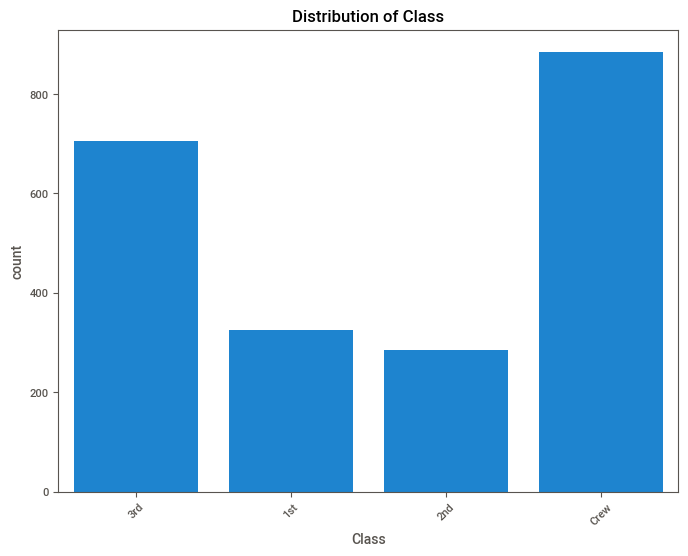

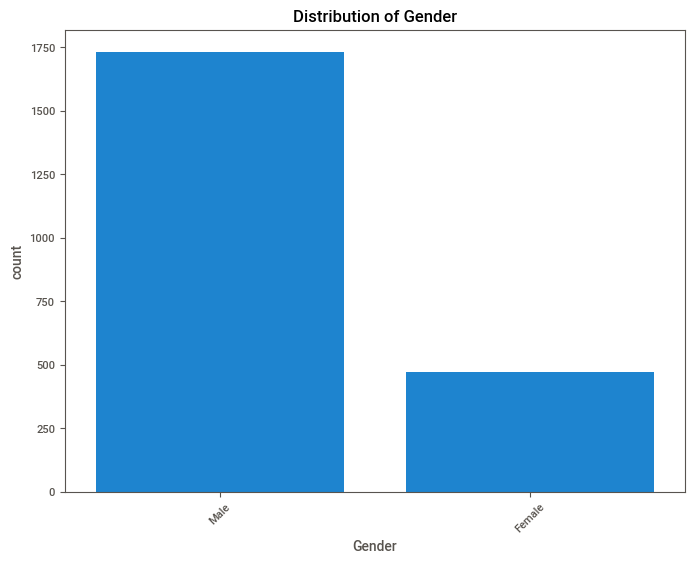

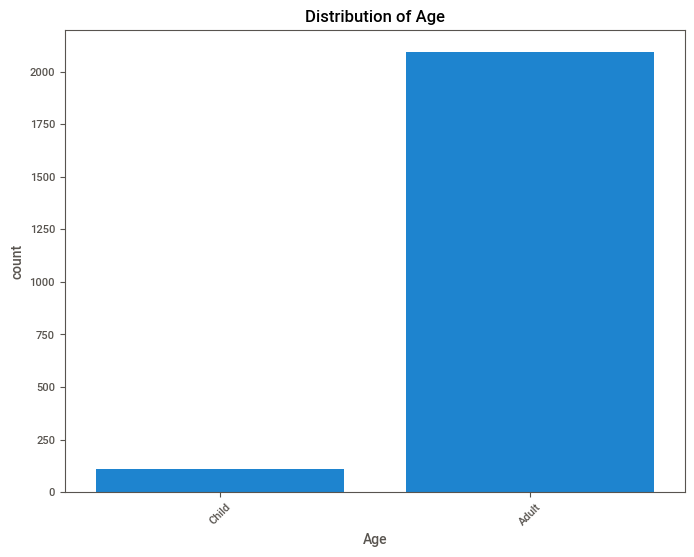

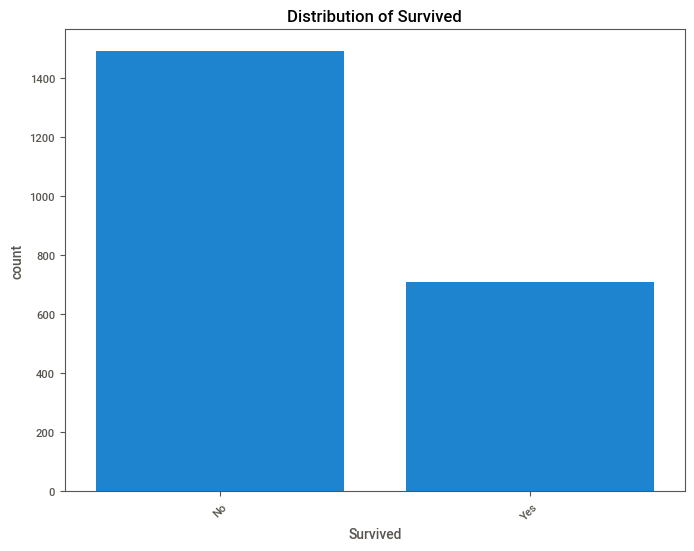

In [159]:
# if __name__ == "__main__":
#     # Load your dataset (replace with actual dataset)
#     df = pd.read_csv("/content/Titanic.csv")

#     eda = EDA(df)
#     eda.generate_sweetviz_report()
#     eda.visualize_data()
#     eda.advanced_visualizations()

In [155]:
# print(df.dtypes)

Class       object
Gender      object
Age         object
Survived    object
dtype: object


In [4]:
# Load a dataset (for example, the famous Titanic dataset)
url = "https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv"
data = pd.read_csv(url)

In [5]:
data.head()

PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S

Summary Statistics:
 {'PassengerId': {'count': 891.0, 'unique': nan, 'top': nan, 'freq': nan, 'mean': 446.0, 'std': 257.3538420152301, 'min': 1.0, '25%': 223.5, '50%': 446.0, '75%': 668.5, 'max': 891.0}, 'Survived': {'count': 891.0, 'unique': nan, 'top': nan, 'freq': nan, 'mean': 0.3838383838383838, 'std': 0.4865924542648585, 'min': 0.0, '25%': 0.0, '50%': 0.0, '75%': 1.0, 'max': 1.0}, 'Pclass': {'count': 891.0, 'unique': nan, 'top': nan, 'freq': nan, 'mean': 2.308641975308642, 'std': 0.8360712409770513, 'min': 1.0, '25%': 2.0, '50%': 3.0, '75%': 3.0, 'max': 3.0}, 'Name': {'count': 891, 'unique': 891, 'top': 'Braund, Mr. Owen Harris', 'freq': 1, 'mean': nan, 'std': nan, 'min': nan, '25%': nan, '50%': nan, '75%': nan, 'max': nan}, 'Sex': {'count': 891, 'unique': 2, 'top': 'male', 'freq': 577, 'mean': nan, 'std': nan, 'min': nan, '25%': nan, '50%': nan, '75%': nan, 'max': nan}, 'Age': {'count': 714.0, 'unique': nan, 'top': nan, 'freq': nan, 'mean': 29.69911764705882, 'std': 14.5264973323

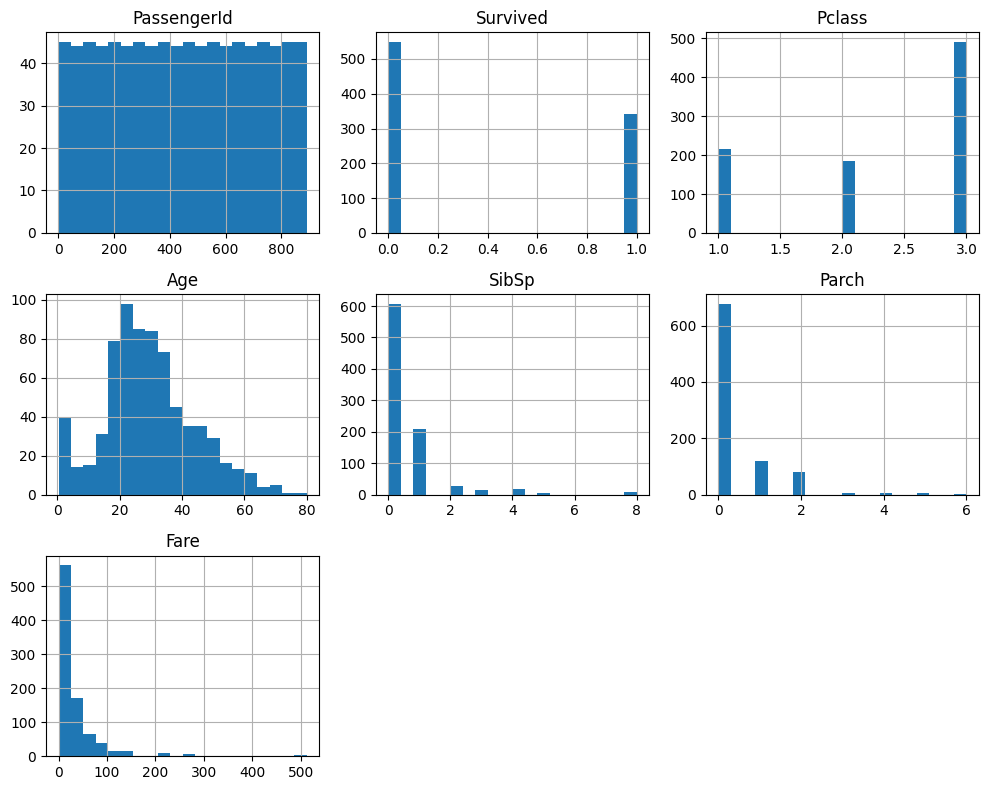

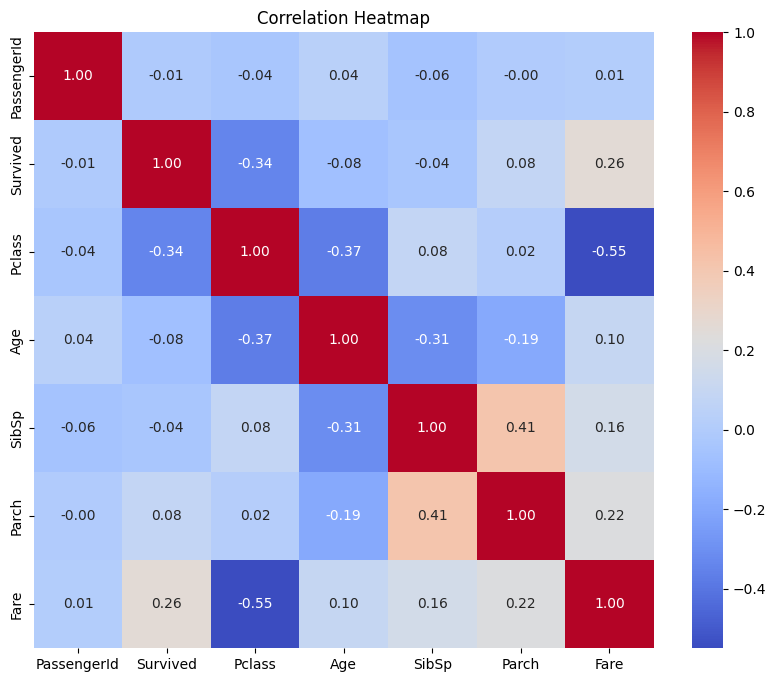

In [6]:
# Initialize EDA module
eda = EDA(data)

# Summary of the data
summary, missing_data = eda.generate_basic_summary()
print("Summary Statistics:\n", summary)
print("\nMissing Data:\n", missing_data)

# Data distribution and correlation
eda.visualize_data()

In [7]:
print(data.dtypes)

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object


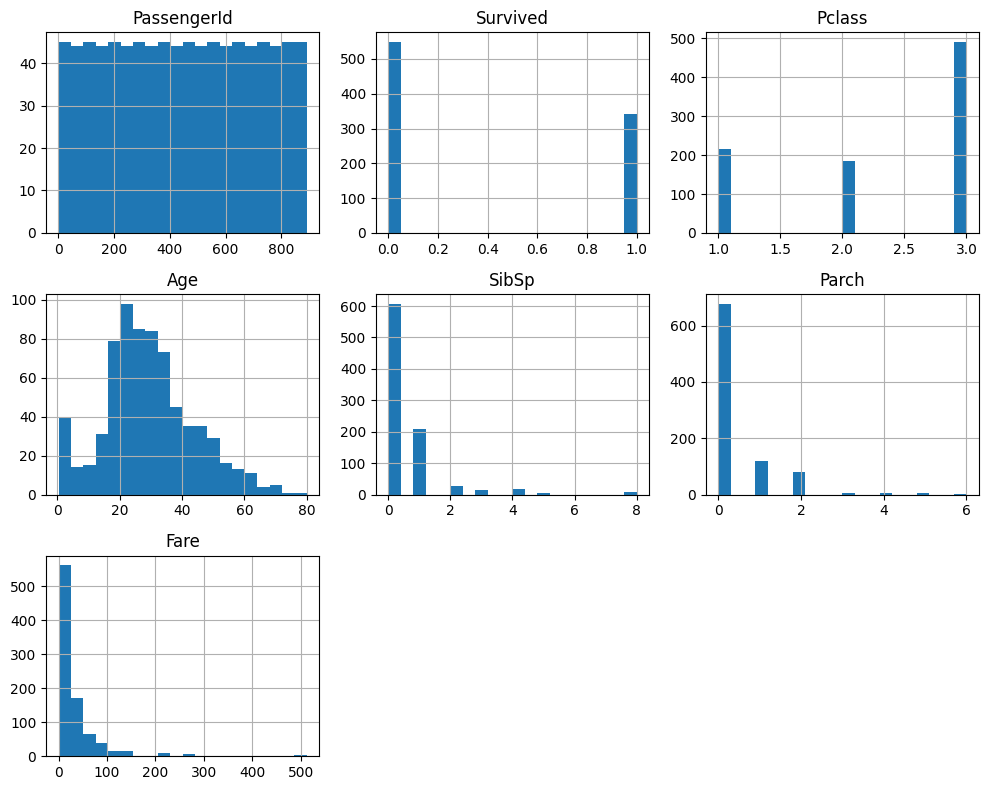

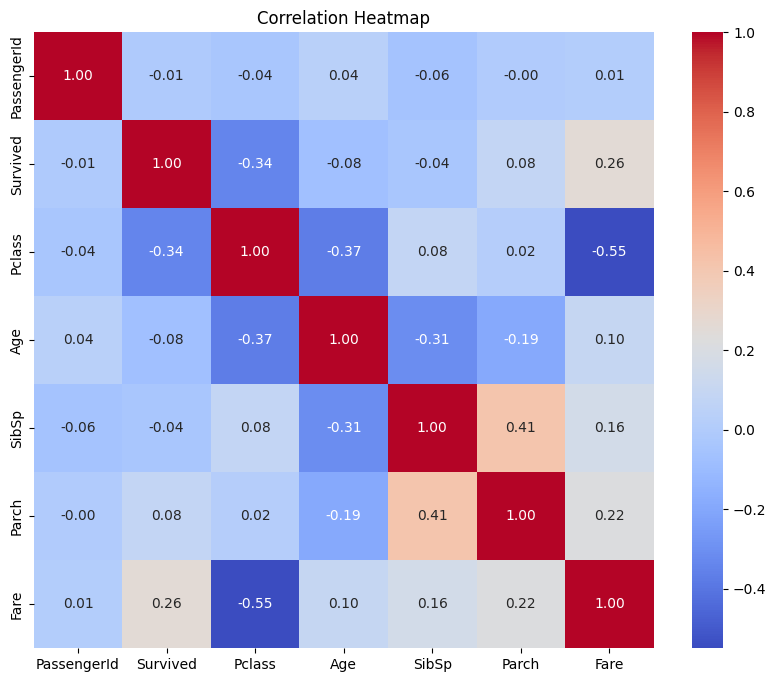

In [8]:
# eda.visualize_data()

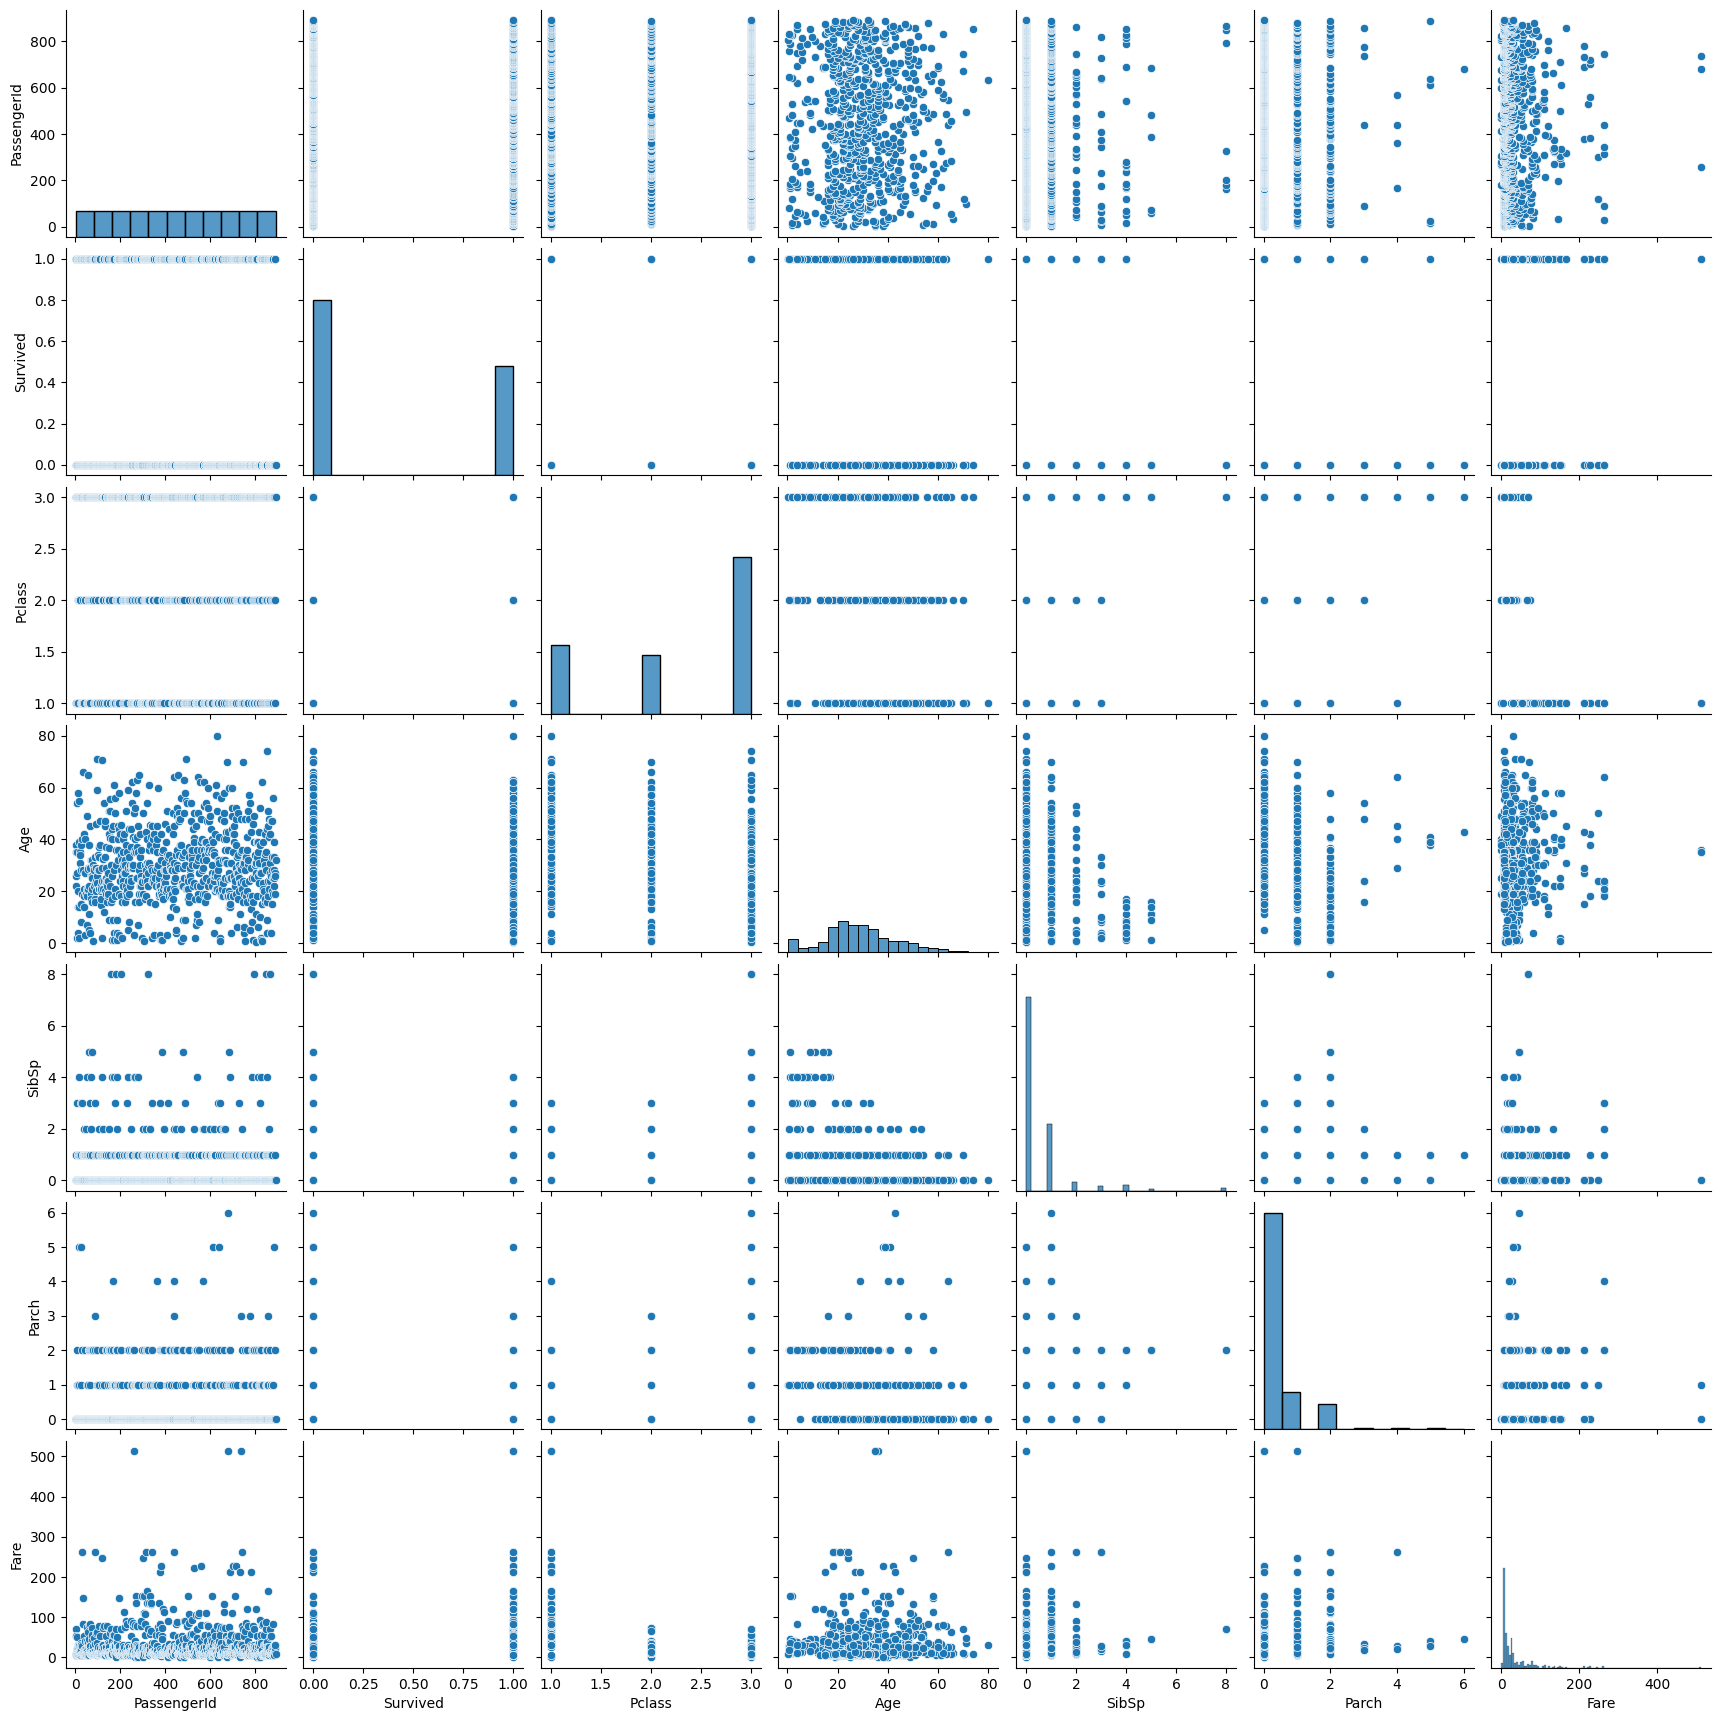

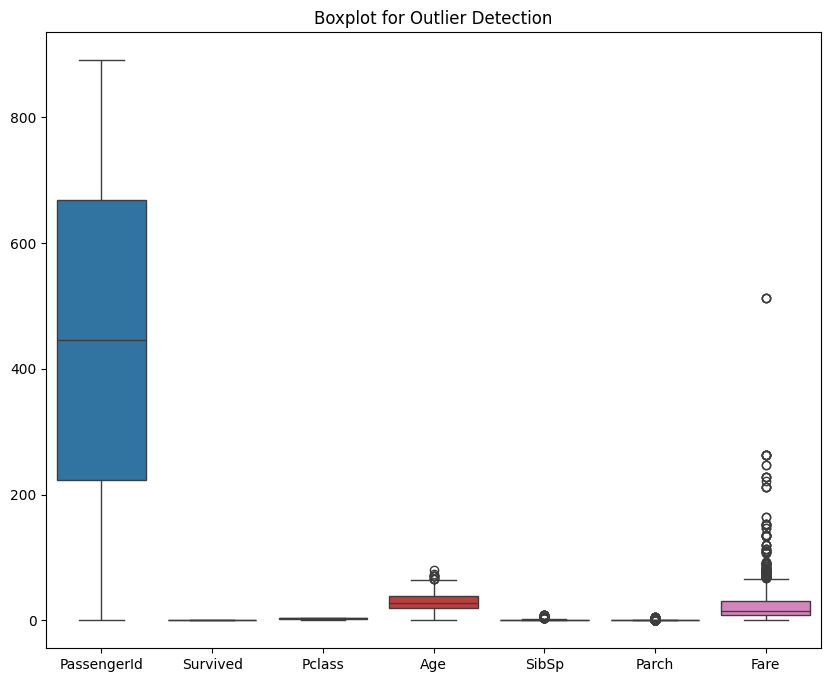

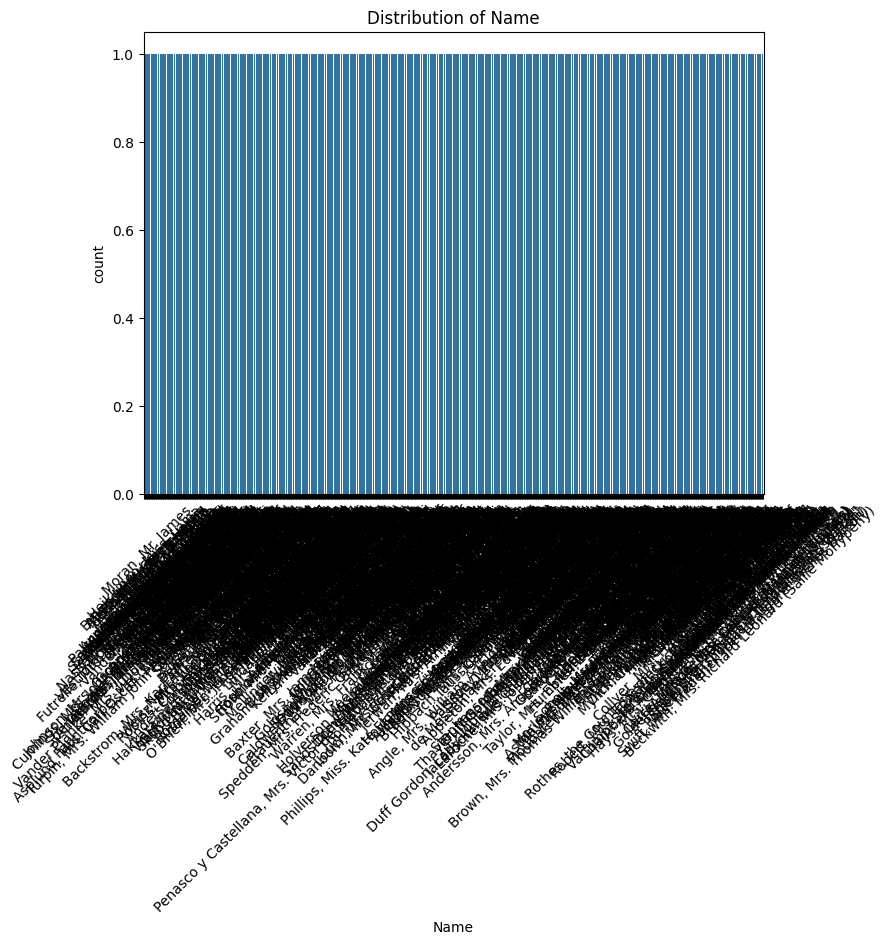

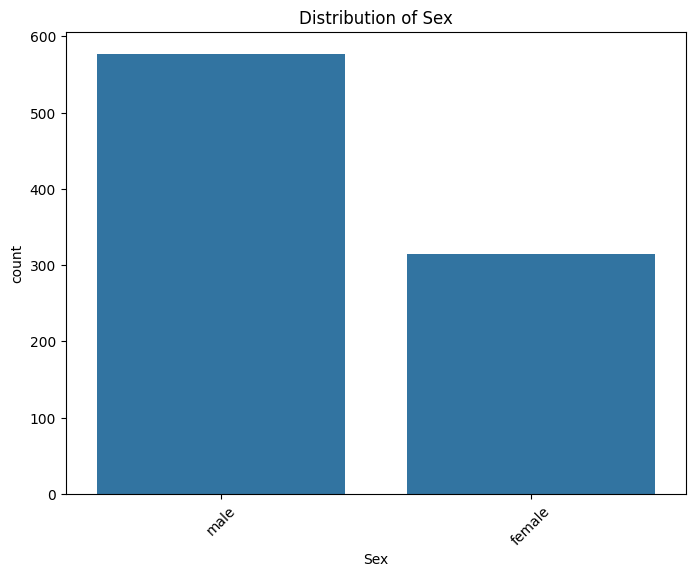

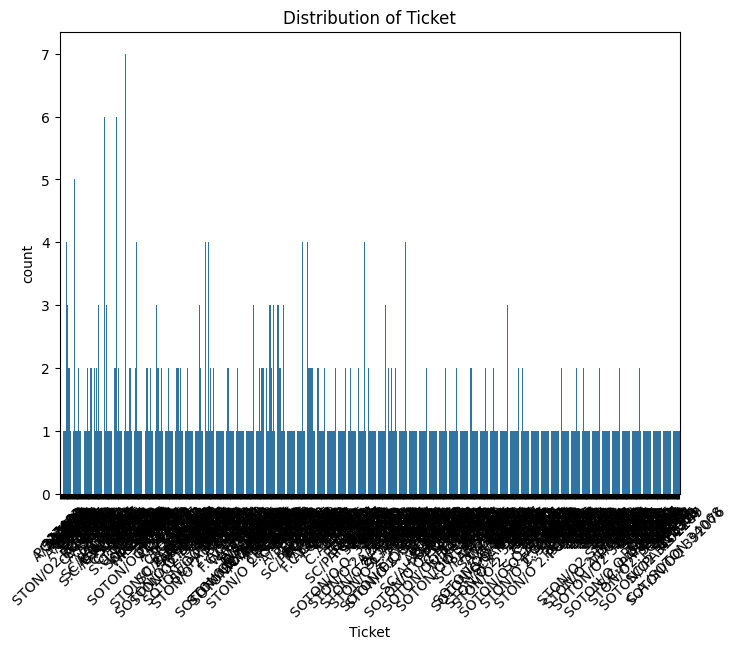

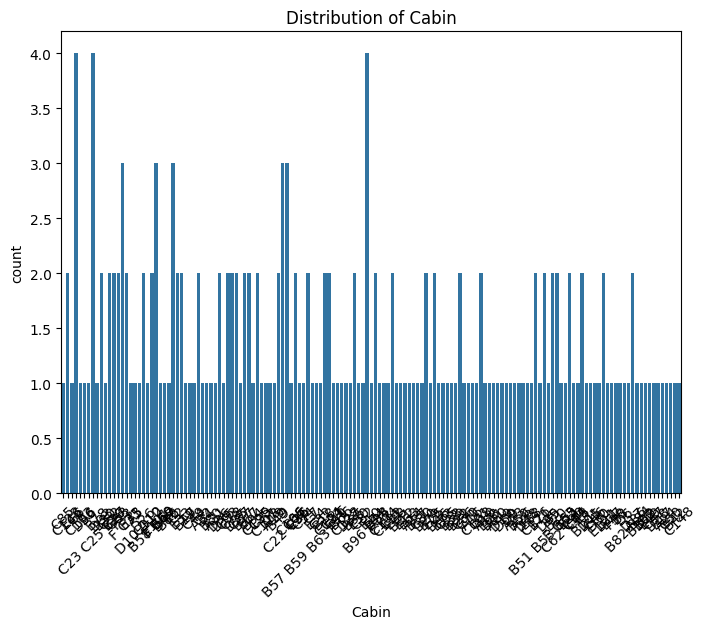

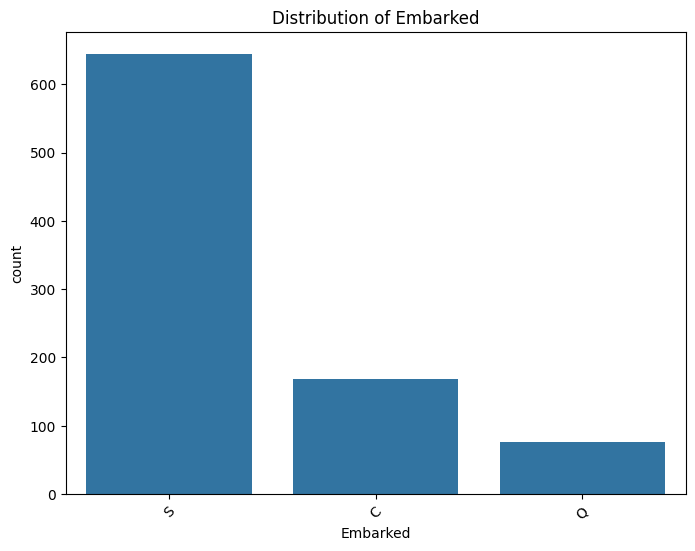

In [9]:
eda.advanced_visualizations()

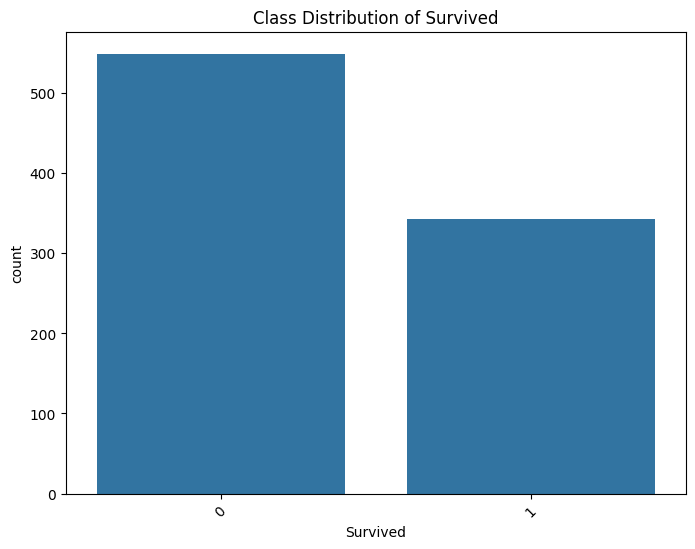

Class Distribution: Survived
0    549
1    342
Name: count, dtype: int64


In [11]:
#Check for Class Imbalance in Target Variable
class_counts = eda.check_class_imbalance('Survived')
print("Class Distribution:", class_counts)

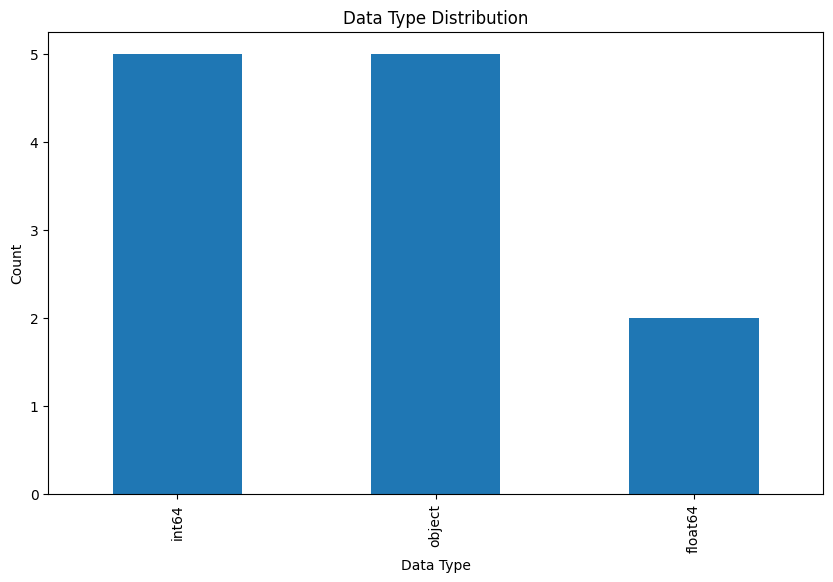

In [12]:
# 12. Data Type Distribution
eda.data_type_distribution()

In [15]:
# Generate an EDA report using Sweetviz
eda.generate_sweetviz_report()

EDA report saved as eda_report.json


{'summary_statistics': {'PassengerId': {'count': 891.0,
   'unique': nan,
   'top': nan,
   'freq': nan,
   'mean': 446.0,
   'std': 257.3538420152301,
   'min': 1.0,
   '25%': 223.5,
   '50%': 446.0,
   '75%': 668.5,
   'max': 891.0},
  'Survived': {'count': 891.0,
   'unique': nan,
   'top': nan,
   'freq': nan,
   'mean': 0.3838383838383838,
   'std': 0.4865924542648585,
   'min': 0.0,
   '25%': 0.0,
   '50%': 0.0,
   '75%': 1.0,
   'max': 1.0},
  'Pclass': {'count': 891.0,
   'unique': nan,
   'top': nan,
   'freq': nan,
   'mean': 2.308641975308642,
   'std': 0.8360712409770513,
   'min': 1.0,
   '25%': 2.0,
   '50%': 3.0,
   '75%': 3.0,
   'max': 3.0},
  'Name': {'count': 891,
   'unique': 891,
   'top': 'Braund, Mr. Owen Harris',
   'freq': 1,
   'mean': nan,
   'std': nan,
   'min': nan,
   '25%': nan,
   '50%': nan,
   '75%': nan,
   'max': nan},
  'Sex': {'count': 891,
   'unique': 2,
   'top': 'male',
   'freq': 577,
   'mean': nan,
   'std': nan,
   'min': nan,
   '25%': na

In [16]:
eda.feature_importance(target_variable="Survived")

Feature set and target variable have inconsistent number of rows: 714 vs 891


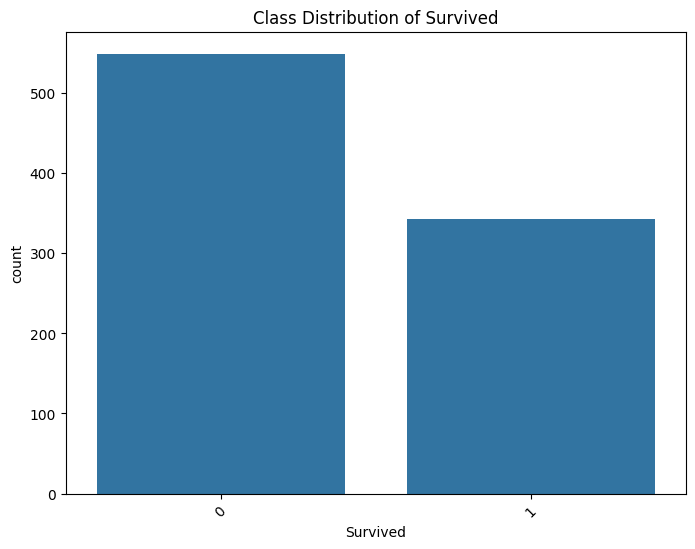

Survived
0    549
1    342
Name: count, dtype: int64

In [17]:
eda.check_class_imbalance(target_variable="Survived")

In [18]:
# Generate a comprehensive EDA report using pandas profiling
eda.generate_advanced_report()

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

# Chatbot

In [55]:
import re
from scipy import stats
import numpy as np
from transformers import pipeline

class EDAChatbotWithLLM:
    def __init__(self, dataset, json_file="eda_summary.json", model_name="gpt2"):
        self.dataset = dataset
        self.json_file = json_file
        self.edited_report = None
        self.summary, self.missing_data = self.generate_detailed_summary()
        self.save_summary_to_json()

        # Initialize the Open-Source LLM
        self.llm = pipeline('text-generation', model=model_name)

    def load_and_parse_report(self, json_file=None):
        """Load and parse the EDA report from a JSON file."""
        if json_file is None:
            json_file = self.json_file

        try:
            with open(json_file, "r") as file:
                eda_report = json.load(file)

            # Store the loaded report in the edited_report attribute
            self.edited_report = eda_report
            return f"EDA report loaded and parsed from {json_file}"

        except FileNotFoundError:
            return f"Error: The file '{json_file}' was not found."

        except json.JSONDecodeError:
            return f"Error: Failed to decode JSON from the file '{json_file}'. Please check the file format."

    def generate_detailed_summary(self):
        """Generate a comprehensive EDA summary of the dataset."""
        # Filter out non-numeric columns for numerical analysis
        numeric_cols = self.dataset.select_dtypes(include='number').columns
        summary = self.dataset[numeric_cols].describe(include='all').to_dict()
        missing_data = self.dataset.isnull().sum().to_dict()
        correlations = self.dataset[numeric_cols].corr().to_dict()
        skewness = self.dataset[numeric_cols].skew().to_dict()
        kurtosis = self.dataset[numeric_cols].kurtosis().to_dict()

        # Calculate outliers using Z-score for numeric columns only
        X = self.dataset[numeric_cols].dropna()
        z_scores = stats.zscore(X)
        outliers = (abs(z_scores) > 3).any(axis=1).sum()

        return {
            "summary_statistics": summary,
            "missing_data": missing_data,
            "correlations": correlations,
            "skewness": skewness,
            "kurtosis": kurtosis,
            "outliers": outliers
        }, missing_data

    def save_summary_to_json(self, json_file=None):
        """Save the EDA summary as a JSON file."""
        if json_file is None:
            json_file = self.json_file

        # Convert all numeric data to standard Python types (e.g., int, float)
        def convert_types(obj):
            if isinstance(obj, (np.int64, np.int32)):
                return int(obj)
            elif isinstance(obj, (np.float64, np.float32)):
                return float(obj)
            elif isinstance(obj, (np.datetime64)):
                return str(obj)  # Convert datetime to string
            elif isinstance(obj, dict):
                return {k: convert_types(v) for k, v in obj.items()}
            elif isinstance(obj, list):
                return [convert_types(i) for i in obj]
            return obj

        # Apply the conversion to all parts of the summary
        eda_summary = {
            "summary_statistics": convert_types(self.summary["summary_statistics"]),
            "missing_data": convert_types(self.summary["missing_data"]),
            "correlations": convert_types(self.summary["correlations"]),
            "skewness": convert_types(self.summary["skewness"]),
            "kurtosis": convert_types(self.summary["kurtosis"]),
            "outliers": convert_types(self.summary["outliers"]),
            "num_rows": self.dataset.shape[0],
            "num_columns": self.dataset.shape[1],
            "column_names": list(self.dataset.columns),
            "data_types": convert_types(self.dataset.dtypes.astype(str).to_dict()),
        }

        # Save the summary as JSON
        with open(json_file, "w") as file:
            json.dump(eda_summary, file, indent=4)
        return f"EDA summary saved to {json_file}"

    def query_mathematical(self, query):
        """Handle mathematical queries based on dataset."""
        numeric_cols = self.dataset.select_dtypes(include='number').columns
        match = re.search(r"column (\w+)", query, re.IGNORECASE)
        column = match.group(1) if match else None

        if column not in numeric_cols:
            return f"Column '{column}' not found or is not numeric."

        if re.search(r"standard deviation", query, re.IGNORECASE):
            return f"Standard deviation of {column}: {self.dataset[column].std():.2f}"
        elif re.search(r"difference.*highest.*second-highest", query, re.IGNORECASE):
            return f"Difference between highest and second-highest in {column}: {self.dataset[column].nlargest(2).diff().iloc[1]:.2f}"
        elif re.search(r"sum.*values.*greater than (\d+)", query, re.IGNORECASE):
            threshold = int(re.search(r"greater than (\d+)", query).group(1))
            return f"Sum of {column} values greater than {threshold}: {self.dataset[self.dataset[column] > threshold][column].sum():.2f}"
        else:
            return "Mathematical query not recognized. Try phrases like 'standard deviation' or 'sum of values'."

    def generate_insight_from_llm(self, query):
        """Use the LLM to generate insights based on the query."""
        prompt = f"Given the dataset and EDA insights, provide an insight on the following: {query}"
        generated_response = self.llm(prompt, max_length=100, num_return_sequences=1)[0]['generated_text']
        return generated_response

    def handle_user_query(self, query):
        """Handle user query - either based on the EDA report or data query."""
        query = query.lower().strip()  # Pre-process query

        if 'eda' in query:
            return self.edited_report or "EDA report not loaded yet. Please load it using `load_and_parse_report`."
        elif 'mathematical' in query:
            return self.query_mathematical(query)
        elif 'insight' in query:
            return self.generate_insight_from_llm(query)  # Generate insight using LLM
        elif 'show me' in query and 'rows' in query:
            # Handle query like "Show me the top 5 rows where column X > 50."
            match = re.search(r"top (\d+)", query)
            top_n = int(match.group(1)) if match else 5
            condition_match = re.search(r"where (\w+) > (\d+)", query)
            if condition_match:
                column = condition_match.group(1)
                value = int(condition_match.group(2))
                filtered_data = self.dataset[self.dataset[column] > value].head(top_n)
                return filtered_data.to_string()
            return "Could not parse the query for top rows."
        elif 'maximum' in query:
            match = re.search(r"maximum.*in (\w+)", query)
            column = match.group(1) if match else None
            if column in self.dataset.columns:
                return f"Maximum value in {column}: {self.dataset[column].max()}"
            return f"Column '{column}' not found."
        else:
            return "Sorry, I couldn't understand your query. Please specify 'EDA', 'mathematical', or 'insight'."

In [56]:
# # Example dataset
url = "https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv"
data = pd.read_csv(url)

# # Initialize the EDA Chatbot with LLM
chatbot = EDAChatbotWithLLM(data)

# # Save EDA summary to JSON
# # print(chatbot.save_summary_to_json())

# # Load and parse the saved EDA summary
print(chatbot.load_and_parse_report())

EDA report loaded and parsed from eda_summary.json


In [57]:
chatbot.summary

{'summary_statistics': {'PassengerId': {'count': 891.0,
   'mean': 446.0,
   'std': 257.3538420152301,
   'min': 1.0,
   '25%': 223.5,
   '50%': 446.0,
   '75%': 668.5,
   'max': 891.0},
  'Survived': {'count': 891.0,
   'mean': 0.3838383838383838,
   'std': 0.4865924542648585,
   'min': 0.0,
   '25%': 0.0,
   '50%': 0.0,
   '75%': 1.0,
   'max': 1.0},
  'Pclass': {'count': 891.0,
   'mean': 2.308641975308642,
   'std': 0.8360712409770513,
   'min': 1.0,
   '25%': 2.0,
   '50%': 3.0,
   '75%': 3.0,
   'max': 3.0},
  'Age': {'count': 714.0,
   'mean': 29.69911764705882,
   'std': 14.526497332334044,
   'min': 0.42,
   '25%': 20.125,
   '50%': 28.0,
   '75%': 38.0,
   'max': 80.0},
  'SibSp': {'count': 891.0,
   'mean': 0.5230078563411896,
   'std': 1.1027434322934275,
   'min': 0.0,
   '25%': 0.0,
   '50%': 0.0,
   '75%': 1.0,
   'max': 8.0},
  'Parch': {'count': 891.0,
   'mean': 0.38159371492704824,
   'std': 0.8060572211299559,
   'min': 0.0,
   '25%': 0.0,
   '50%': 0.0,
   '75%': 0

In [58]:
print(chatbot.handle_user_query("Show me the EDA insights"))

{'summary_statistics': {'PassengerId': {'count': 891.0, 'mean': 446.0, 'std': 257.3538420152301, 'min': 1.0, '25%': 223.5, '50%': 446.0, '75%': 668.5, 'max': 891.0}, 'Survived': {'count': 891.0, 'mean': 0.3838383838383838, 'std': 0.4865924542648585, 'min': 0.0, '25%': 0.0, '50%': 0.0, '75%': 1.0, 'max': 1.0}, 'Pclass': {'count': 891.0, 'mean': 2.308641975308642, 'std': 0.8360712409770513, 'min': 1.0, '25%': 2.0, '50%': 3.0, '75%': 3.0, 'max': 3.0}, 'Age': {'count': 714.0, 'mean': 29.69911764705882, 'std': 14.526497332334044, 'min': 0.42, '25%': 20.125, '50%': 28.0, '75%': 38.0, 'max': 80.0}, 'SibSp': {'count': 891.0, 'mean': 0.5230078563411896, 'std': 1.1027434322934275, 'min': 0.0, '25%': 0.0, '50%': 0.0, '75%': 1.0, 'max': 8.0}, 'Parch': {'count': 891.0, 'mean': 0.38159371492704824, 'std': 0.8060572211299559, 'min': 0.0, '25%': 0.0, '50%': 0.0, '75%': 0.0, 'max': 6.0}, 'Fare': {'count': 891.0, 'mean': 32.204207968574636, 'std': 49.693428597180905, 'min': 0.0, '25%': 7.9104, '50%': 14

In [59]:
print(chatbot.handle_user_query("What are the missing values insights?"))

Truncation was not explicitly activated but `max_length` is provided a specific value, please use `truncation=True` to explicitly truncate examples to max length. Defaulting to 'longest_first' truncation strategy. If you encode pairs of sequences (GLUE-style) with the tokenizer you can select this strategy more precisely by providing a specific strategy to `truncation`.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


Given the dataset and EDA insights, provide an insight on the following: what are the missing values insights? As part of the EDA analysis, how do you select the missing values? The dataset and EDA insights show that most of the missing values are: The value was not included if it is only a few hundred or more decimal places

The value was not added if there doesn't have an "X" notation on it

The value wasn't changed if the value contains only


In [66]:
print(chatbot.handle_user_query(query='Give me insights about age and survived columns'))

Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


Given the dataset and EDA insights, provide an insight on the following: give me insights about age and survived columns,

give me an insight on survival strategies and diet,

show the life history of different participants,

show the life history of different participants, and

give me an overview of mortality.


A simple table that plots individual age and age. You can also read how the life history of your cohort has changed. To summarise the data (with the


In [65]:
print(chatbot.handle_user_query('what is the maximum value in Fare?'))

Column 'fare' not found.


In [45]:
data.head()

PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S